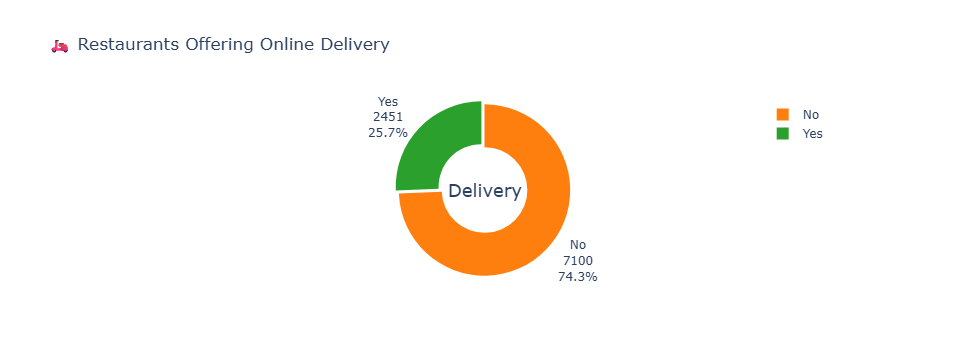

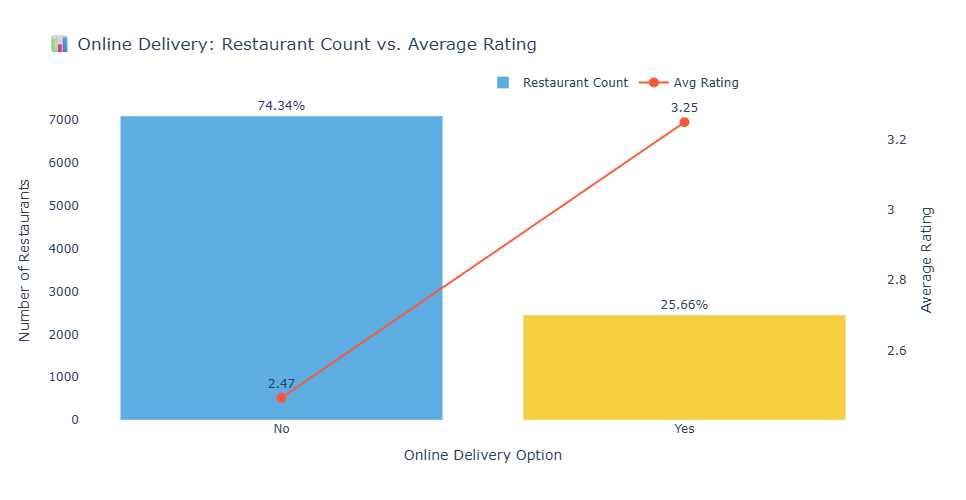

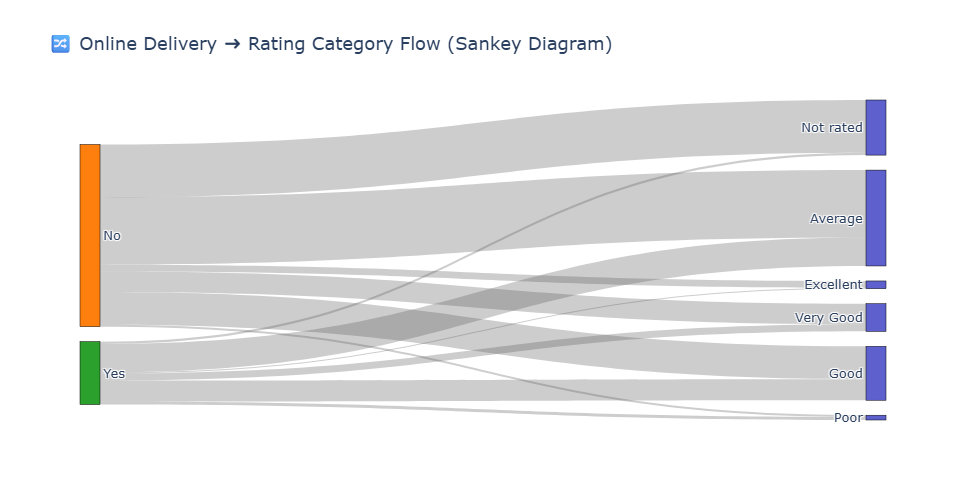

In [9]:
# Imports
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load dataset
df = pd.read_csv(r"C:\Users\acer\Downloads\Data Analysis Internship__Dataset__Cognifyz Technologies.csv")

# Keep only relevant entries
df_clean = df[df['Has Online delivery'].isin(['Yes', 'No'])].copy()

# ===============================
# 1. Donut Pie: Online Delivery %
# ===============================

ordered_labels = ['Yes', 'No']
delivery_counts = df_clean['Has Online delivery'].value_counts()
delivery_counts = delivery_counts.reindex(ordered_labels)

fig1 = go.Figure(data=[
    go.Pie(
        labels=delivery_counts.index,
        values=delivery_counts.values,
        textinfo='label+percent+value',
        hoverinfo='label+percent+value',
        marker=dict(colors=['#2CA02C', '#FF7F0E']),  # Yes = Green, No = Orange
        pull=[0.05, 0],
        hole=0.5
    )
])
fig1.update_layout(
    title='🛵 Restaurants Offering Online Delivery',
    annotations=[dict(text='Delivery', x=0.5, y=0.5, showarrow=False, font_size=18)],
    showlegend=True
)
fig1.show()
fig1.write_html("online_delivery_pie_enhanced.html")

# ====================================================
# 2. Grouped Bar + Line Chart: Count vs Avg Rating
# ====================================================

avg_rating_by_delivery = df_clean.groupby('Has Online delivery')['Aggregate rating'].agg(['mean', 'count']).reset_index()
avg_rating_by_delivery.columns = ['Online Delivery', 'Avg Rating', 'Total Restaurants']
avg_rating_by_delivery['Percentage'] = (avg_rating_by_delivery['Total Restaurants'] / df_clean.shape[0] * 100).round(2)

# Custom colors: Yes = Yellow, No = Light Blue
bar_colors = ['#F4D03F' if val == 'Yes' else '#5DADE2' for val in avg_rating_by_delivery['Online Delivery']]

fig2 = go.Figure()

# Bar trace
fig2.add_trace(go.Bar(
    x=avg_rating_by_delivery['Online Delivery'],
    y=avg_rating_by_delivery['Total Restaurants'],
    name='Restaurant Count',
    marker_color=bar_colors,
    text=avg_rating_by_delivery['Percentage'].astype(str) + '%',
    textposition='outside'
))

# Line trace
fig2.add_trace(go.Scatter(
    x=avg_rating_by_delivery['Online Delivery'],
    y=avg_rating_by_delivery['Avg Rating'],
    name='Avg Rating',
    mode='lines+markers+text',
    marker=dict(size=10, color='#FF5733'),
    text=avg_rating_by_delivery['Avg Rating'].round(2),
    textposition='top center',
    yaxis='y2'
))

fig2.update_layout(
    title="📊 Online Delivery: Restaurant Count vs. Average Rating",
    xaxis=dict(title='Online Delivery Option'),
    yaxis=dict(title='Number of Restaurants'),
    yaxis2=dict(title='Average Rating', overlaying='y', side='right'),
    legend=dict(x=0.5, y=1.1, orientation='h'),
    plot_bgcolor='white',
    height=500
)
fig2.show()
fig2.write_html("delivery_rating_comparison_grouped.html")

# ==========================================
# 3. Sankey Diagram: Delivery → Rating Text
# ==========================================

df_sankey = df[df['Has Online delivery'].isin(['Yes', 'No']) & df['Rating text'].notna()]

# Define fixed order
rating_order = ['Excellent', 'Very Good', 'Good', 'Average', 'Poor', 'Not rated']
delivery_order = ['Yes', 'No']
all_labels = delivery_order + rating_order  # Final order

# Group data
flow_df = df_sankey.groupby(['Has Online delivery', 'Rating text']).size().reset_index(name='Count')
flow_df = flow_df[flow_df['Rating text'].isin(rating_order)]

# Correct index mapping
label_to_index = {label: i for i, label in enumerate(all_labels)}
flow_df['source'] = flow_df['Has Online delivery'].map(label_to_index)
flow_df['target'] = flow_df['Rating text'].map(label_to_index)
flow_df['value'] = flow_df['Count']

# Build Sankey
fig3 = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color=['#2CA02C', '#FF7F0E'] + ['#5E60CE'] * len(rating_order)
    ),
    link=dict(
        source=flow_df['source'],
        target=flow_df['target'],
        value=flow_df['value'],
        color="rgba(90,90,90,0.3)"
    )
)])

fig3.update_layout(
    title_text="🔀 Online Delivery ➜ Rating Category Flow (Sankey Diagram)",
    font_size=13,
    height=500,
    plot_bgcolor='white'
)
fig3.show()
fig3.write_html("online_delivery_rating_sankey_clean.html")
